# Оценка качества моделей машинного обучения

- Предположим, что мы построили несколько моделей машинного обучения. Как понять, какая из этих моделей лучше предсказывает результаты?
- Для этого используются различные метрики качества моделей машинного обучения. Для каждой модели можно вычислить значения метрик, и на их основе понять, какая из моделей лучше.
- Существует большое количество метрик для различных классов алгоритмов машинного обучения. Изобретение новых, хорошо интерпретируемых метрик является одной из важных задач машинного обучения.
- На этой лекции мы будем говорить только о метриках качества для задач обучения с учителем: классификации и регресии.
- [Страница по оценке качества моделей в scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html)

## План:
### [Метрики качества классификации](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

   1. [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)

   1. Матрица ошибок или [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
   
   1. Precision, recall и F-мера
   
   1. [ROC-кривая и ROC AUC](https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics)
   
   1. Кривая precision-recall
   
   1. [Логистическая функция потерь - log loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)

### [Метрики качества регрессии](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

   1. [Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) - средняя абсолютная ошибка

   1. [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) - средняя квадратичная ошибка, и [Root mean squared error](https://en.wikipedia.org/wiki/Root-mean-square_deviation) - корень из средней квадратичной ошибки
   
   1. Median absolute error
   
   1. [Метрика $R^2$ или коэффициент детерминации](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8) 
   
   

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Изучение качества классификации

**Решение задачи классификации - это предсказание значений качественного (категориального) признака.**

### Подготовка данных и построение базовых моделей для оценки качества

Будем использовать набор данных про вина.

In [2]:
# https://scikit-learn.org/stable/datasets/index.html#wine-dataset
wine = load_wine()

In [3]:
# Наименования признаков
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
# Значения признаков
wine.data[:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [5]:
type(wine.data)

numpy.ndarray

In [6]:
# Значения целевого признака
np.unique(wine.target)

array([0, 1, 2])

In [7]:
# Наименования значений целевого признака
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
list(zip(np.unique(wine.target), wine.target_names))

[(0, 'class_0'), (1, 'class_1'), (2, 'class_2')]

In [9]:
# Значения целевого признака
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
# Размер выборки
wine.data.shape, wine.target.shape

((178, 13), (178,))

In [11]:
# Сформируем DataFrame
wine_df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [12]:
# И выведем его статистические характеристики
wine_df.describe()

# Для обучения моделей не обязательно создавать DataFrame
# можно использовать массивы numpy

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


#### Разделение выборки на обучающую и тестовую

Для разделения выборки на обучающую и тестовую используется функция [train_test_split.](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [13]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    wine.data, wine.target, test_size=0.5, random_state=1)

Как правило, параметр test_size устанавливают в 20% или 30%. Здесь используется test_size=0.5 (50%) чтобы искусственно "ухудшить" результат на хорошем наборе данных и показать различные возможности использования метрик качества.

Параметр random_state позволяет задавать базовое значение для генератора случайных чисел. Это делает разбиение неслучайным. Если задается параметр random_state то результаты разбиения будут одинаковыми при различных запусках. На практике этот параметр удобно использовать для создания "устойчивых" учебных примеров, которые выдают одинаковый результат при различных запусках.

In [14]:
# Размер обучающей выборки
wine_X_train.shape, wine_y_train.shape

((89, 13), (89,))

In [15]:
# Размер тестовой выборки
wine_X_test.shape, wine_y_test.shape

((89, 13), (89,))

Функция train_test_split разделила исходную выборку таким образом, чтобы в обучающей и тестовой частях сохранились все классы.

In [16]:
np.unique(wine_y_train)

array([0, 1, 2])

In [17]:
np.unique(wine_y_test)

array([0, 1, 2])

In [18]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [19]:
# В исходной выборке нет явного дисбаланса классов для целевого признака
print_class_proportions(wine.target)

# Функция train_test_split разделила исходную выборку таким образом, 
# чтобы в обучающей и тестовой частях сохранились пропорции классов.

Метка 	 Количество 	 Процент встречаемости
0 	 59 	 	 33.15%
1 	 71 	 	 39.89%
2 	 48 	 	 26.97%


In [20]:
# Для обучающей выборки
print_class_proportions(wine_y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 26 	 	 29.21%
1 	 37 	 	 41.57%
2 	 26 	 	 29.21%


In [21]:
# Для тестовой выборки
print_class_proportions(wine_y_test)

Метка 	 Количество 	 Процент встречаемости
0 	 33 	 	 37.08%
1 	 34 	 	 38.2%
2 	 22 	 	 24.72%


#### Построим базовые модели на основе метода ближайших соседей 

In [22]:
# 2 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=2)
cl1_1.fit(wine_X_train, wine_y_train)
target1_1 = cl1_1.predict(wine_X_test)
len(target1_1), target1_1

(89,
 array([0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0,
        1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        1]))

In [23]:
# 10 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=10)
cl1_2.fit(wine_X_train, wine_y_train)
target1_2 = cl1_2.predict(wine_X_test)
len(target1_2), target1_2

(89,
 array([1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2,
        0, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0,
        1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0,
        1]))

In [24]:
# 50 ближайших соседей
cl1_3 = KNeighborsClassifier(n_neighbors=50)
cl1_3.fit(wine_X_train, wine_y_train)
target1_3 = cl1_3.predict(wine_X_test)
len(target1_3), target1_3

(89,
 array([2, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 2,
        0, 0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1, 2, 0,
        1]))

Как понять какая модель дает лучшее качество предсказания?

## Метрики качества классификации

### 1) [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)

Метрика вычисляет процент (долю в диапазоне от 0 до 1) правильно определенных классов. 

Эту метрику обычно переводят как "точность", но перевод не является удачным, потому что совпадает с переводом для другой метрики - "precision".

Чтобы не сталкиваться с неточностями перевода, названия метрик можно не переводить. 

In [25]:
# wine_y_test - эталонное значение классов из исходной (тестовой) выборки
# target* - предсказанное значение классов

# 2 ближайших соседа
accuracy_score(wine_y_test, target1_1)

0.6404494382022472

In [26]:
# 10 ближайших соседей
accuracy_score(wine_y_test, target1_2)

0.6629213483146067

In [27]:
# 50 ближайших соседей
accuracy_score(wine_y_test, target1_3)

0.7191011235955056

Точность в случае 50 ближайших соседей составляет 72%, в случае 10 ближайших соседей составляет 66%, в случае 2 ближайших соседей составляет 64%.

Метрика "Accuracy" показывает точность по всем классам, но точность может быть различной для различных классов.


In [28]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [29]:
# 2 ближайших соседа
print_accuracy_score_for_classes(wine_y_test, target1_1)

Метка 	 Accuracy
0 	 0.7878787878787878
1 	 0.8529411764705882
2 	 0.09090909090909091


Accuracy для классов 0 и 1 составляет 79% и 85%, но для класса 2 только 9%.

In [30]:
# 10 ближайших соседей
print_accuracy_score_for_classes(wine_y_test, target1_2)

Метка 	 Accuracy
0 	 0.7878787878787878
1 	 0.8235294117647058
2 	 0.22727272727272727


In [31]:
# 50 ближайших соседей
print_accuracy_score_for_classes(wine_y_test, target1_3)

Метка 	 Accuracy
0 	 0.8484848484848485
1 	 0.7941176470588235
2 	 0.4090909090909091


Accuracy для класса 0 и 1 составляет 84% и 79%, но для класса 2 всего 41%.

В случае дисбаланса классов **только для бинарной классификации** рекомендуется использовать метрику [balanced_accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score). Но при этом все равно стоит следить за точностью на отдельных классах.

In [32]:
# Конвертация целевого признака в бинарный
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

In [33]:
# Если целевой признак ==2, 
# то будем считать этот случай 1 в бинарном признаке
bin_wine_y_train = convert_target_to_binary(wine_y_train, 2)
list(zip(wine_y_train, bin_wine_y_train))[:10]

[(1, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (2, 1),
 (1, 0),
 (1, 0),
 (1, 0)]

In [34]:
bin_wine_y_test = convert_target_to_binary(wine_y_test, 2)
list(zip(wine_y_test, bin_wine_y_test))[:10]

[(2, 1),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (2, 1),
 (1, 0),
 (0, 0),
 (2, 1),
 (1, 0)]

In [35]:
# Конвертация предсказанных признаков
bin_target1_1 = convert_target_to_binary(target1_1, 2)
bin_target1_2 = convert_target_to_binary(target1_2, 2)
bin_target1_3 = convert_target_to_binary(target1_3, 2)

In [36]:
balanced_accuracy_score(bin_wine_y_test, bin_target1_1)

0.5156037991858887

In [37]:
balanced_accuracy_score(bin_wine_y_test, bin_target1_2)

0.5390094979647219

In [38]:
balanced_accuracy_score(bin_wine_y_test, bin_target1_3)

0.6299185888738128

#### Вывод. 
Метрика Accuracy интуитивно понятна и часто используется на практике. Но если количество классов относительно невелико, то лучше всего вычислять Accuracy отдельно для каждого класса.

### 2) Матрица ошибок или [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

Количество верно и ошибочно классифицированных данных, представленное в виде матрицы.


Рассмотрим случай бинарной классификации.

Будем использовать следующие обозначения:
- $y$ - истинное значение целевого признака
- $\hat{y}$ - предсказанное значение целевого признака
- True Positive (TP) - количество верно предсказанных значений 1 класса
- False Positive (FP) - количество неверно предсказанных значений 1 класса (предсказана 1 но истинное значение 0) - ошибка I рода, «ложное срабатывание».
- True Negative (TN) - количество верно предсказанных значений 0 класса
- False Negative (FN) - количество неверно предсказанных значений 0 класса (предсказан 0 но истинное значение 1) - ошибка II рода, «пропуск цели, пропуск события».

В случае бинарной классификации матрица ошибок выглядит следующим образом:

| Предсказанное/истинное значение | $y=1$ | $y=0$ |
| --- | --- | --- |
| $\hat{y}=1$ | True Positive (TP) | False Positive (FP) |
| $\hat{y}=0$ | False Negative (FN) | True Negative (TN) |

Для построения матрицы будем использовать функцию [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) из библиотеки scikit-learn.

Функция confusion_matrix выводит строки и столбцы таблицы в другом порядке:

| Истинное/предсказанное значение | $\hat{y}=0$ | $\hat{y}=1$ |
| --- | --- | --- |
| $y=0$ | True Negative (TN) | False Positive (FP) |
| $y=1$ | False Negative (FN) | True Positive (TP) |


In [39]:
confusion_matrix(bin_wine_y_test, bin_target1_1, labels=[0, 1])

array([[63,  4],
       [20,  2]], dtype=int64)

In [40]:
tn, fp, fn, tp = confusion_matrix(bin_wine_y_test, bin_target1_1).ravel()
tn, fp, fn, tp

(63, 4, 20, 2)

In [41]:
# Пример для небинарной классификации
confusion_matrix(wine_y_test, target1_1, labels=[0, 1, 2])

array([[26,  5,  2],
       [ 3, 29,  2],
       [ 4, 16,  2]], dtype=int64)

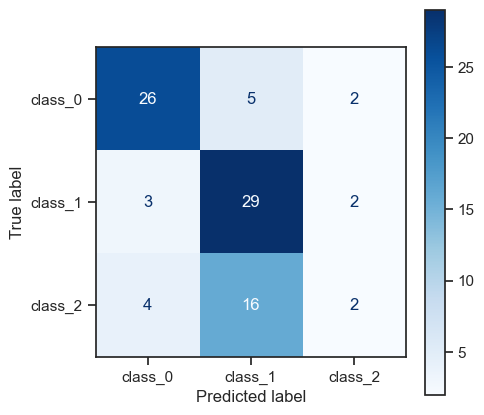

In [42]:
y_pred = cl1_1.predict(wine_X_test)
cm = confusion_matrix(wine_y_test, y_pred)

# Шаг 2: Создать объект ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)

# Шаг 3: Отобразить объект ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()

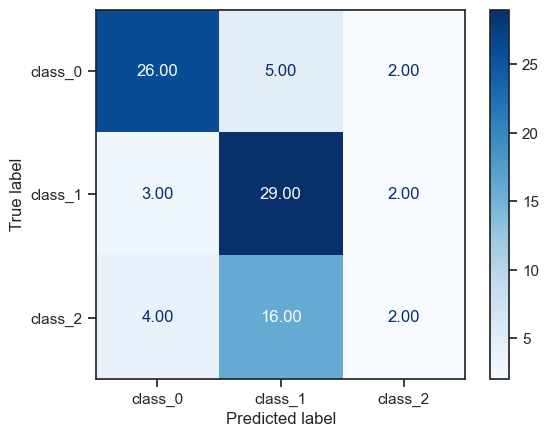

In [43]:
conf_matrix = confusion_matrix(wine_y_test, cl1_1.predict(wine_X_test))

# Создание объекта ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, 
                              display_labels=wine.target_names)

# Построение матрицы ошибок
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
plt.show()

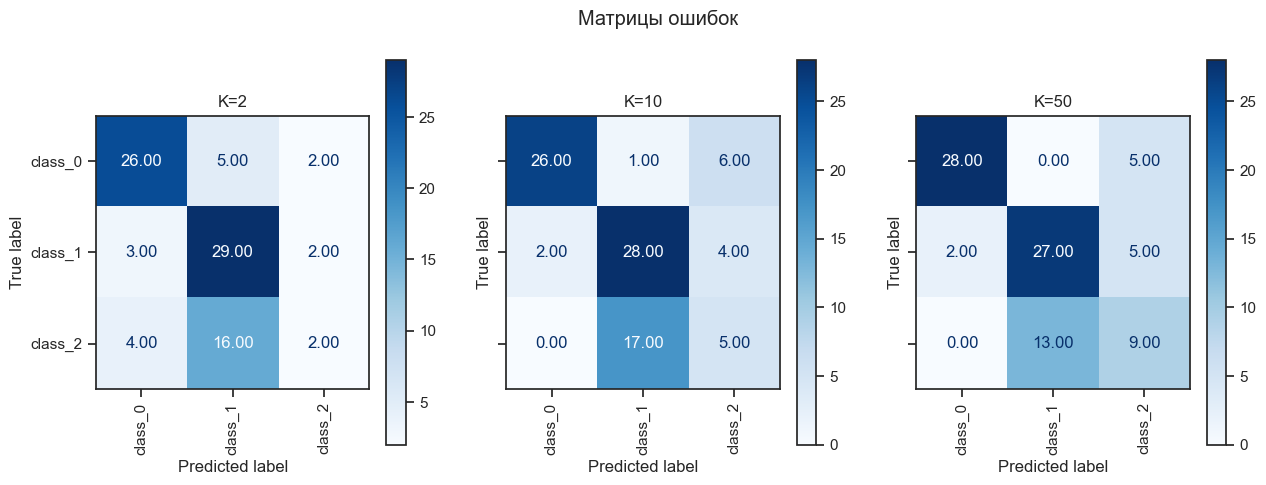

In [44]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))

confusion_matrix1 = confusion_matrix(wine_y_test, cl1_1.predict(wine_X_test))
disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix1, display_labels=wine.target_names)
disp1.plot(cmap=plt.cm.Blues, ax=ax[0], xticks_rotation='vertical', values_format='.2f')
disp1.ax_.set_title('K=2')

confusion_matrix2 = confusion_matrix(wine_y_test, cl1_2.predict(wine_X_test))
disp2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix2, display_labels=wine.target_names)
disp2.plot(cmap=plt.cm.Blues, ax=ax[1], xticks_rotation='vertical', values_format='.2f')
disp2.ax_.set_title('K=10')

confusion_matrix3 = confusion_matrix(wine_y_test, cl1_3.predict(wine_X_test))
disp2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix3, display_labels=wine.target_names)
disp2.plot(cmap=plt.cm.Blues, ax=ax[2], xticks_rotation='vertical', values_format='.2f')
disp2.ax_.set_title('K=50')

fig.suptitle('Матрицы ошибок')

plt.show()

### 3) Precision, recall и F-мера

В случае бинарной классификации матрица ошибок выглядит следующим образом:

| Предсказанное/истинное значение | $y=1$ | $y=0$ |
| --- | --- | --- |
| $\hat{y}=1$ | True Positive (TP) | False Positive (FP) |
| $\hat{y}=0$ | False Negative (FN) | True Negative (TN) |

#### Метрика precision:

Можно переводить как точность, но такой перевод совпадает с переводом метрики "accuracy".

$precision = \frac{TP}{TP+FP}$

Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция [precision_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

#### Метрика recall (полнота):

$recall = \frac{TP}{TP+FN}$

Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Используется функция [recall_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

#### Метрика accuracy:

Уже знакомая метрика accuracy может быть записана с помощью следующей формулы:

$accuracy = \frac{TP+TN}{TP+TN+FP+FN}$

Доля верно предсказанных классификатором положительных и отрицательных объектов.

In [45]:
# По умолчанию метрики считаются для 1 класса бинарной классификации
# Для 2 ближайших соседей
precision_score(bin_wine_y_test, bin_target1_1), recall_score(bin_wine_y_test, bin_target1_1)

(0.3333333333333333, 0.09090909090909091)

In [46]:
# Для 10 ближайших соседей
precision_score(bin_wine_y_test, bin_target1_2), recall_score(bin_wine_y_test, bin_target1_2)

(0.3333333333333333, 0.22727272727272727)

In [47]:
# Для 50 ближайших соседей
precision_score(bin_wine_y_test, bin_target1_3), recall_score(bin_wine_y_test, bin_target1_3)

(0.47368421052631576, 0.4090909090909091)

Параметр average (уровень детализации метрик) описан в документации к функциям. Рассмотрим данный параметр на примере 

In [48]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам
precision_score(wine_y_test, target1_1, average='micro')

0.6404494382022472

In [49]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов не учитывается.
precision_score(wine_y_test, target1_1, average='macro')

0.567070707070707

In [50]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется средневзвешенное значение, дисбаланс классов учитывается 
# в виде веса классов (вес - количество истинных значений каждого класса).
precision_score(wine_y_test, target1_1, average='weighted')

0.5961048689138577

#### F-мера

Для того, чтобы объединить precision и recall в единую метрику используется $F_\beta$-мера, которая вычисляется как среднее гармоническое от precision и recall:

$F_\beta = (1+\beta^2) \cdot \frac{precision \cdot recall}{precision + recall}$

где $\beta$ определяет вес точности в метрике.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при $\beta=1$:

$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

Для вычисления используется функция [f1_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

Для обощенного случая используется [fbeta_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html#sklearn.metrics.fbeta_score)

Параметр average используется как в случае с precision и recall.

In [51]:
f1_score(bin_wine_y_test, bin_target1_2)

0.2702702702702703

In [52]:
f1_score(wine_y_test, target1_1, average='micro')

0.6404494382022472

In [53]:
f1_score(wine_y_test, target1_1, average='macro')

0.5404040404040403

In [54]:
f1_score(wine_y_test, target1_1, average='weighted')

0.5912252541466024

Функция [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) позволяет выводить значения точности, полноты и F-меры для всех классов выборки.

In [55]:
classification_report(wine_y_test, target1_1, 
                      target_names=wine.target_names, output_dict=True)

{'class_0': {'precision': 0.7878787878787878,
  'recall': 0.7878787878787878,
  'f1-score': 0.7878787878787878,
  'support': 33.0},
 'class_1': {'precision': 0.58,
  'recall': 0.8529411764705882,
  'f1-score': 0.6904761904761905,
  'support': 34.0},
 'class_2': {'precision': 0.3333333333333333,
  'recall': 0.09090909090909091,
  'f1-score': 0.14285714285714285,
  'support': 22.0},
 'accuracy': 0.6404494382022472,
 'macro avg': {'precision': 0.567070707070707,
  'recall': 0.5772430184194889,
  'f1-score': 0.5404040404040403,
  'support': 89.0},
 'weighted avg': {'precision': 0.5961048689138577,
  'recall': 0.6404494382022472,
  'f1-score': 0.5912252541466024,
  'support': 89.0}}

### 4) [ROC-кривая и ROC AUC](https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics)

Используется для оценки качества бинарной классификации.

[Детальная статья в википедии.](https://ru.wikipedia.org/wiki/ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F)

Основана на вычислении следующих характеристик:

$TPR = \frac{TP}{TP+FN}$ - True Positive Rate, откладывается по оси ординат. Совпадает с recall.

$FPR = \frac{FP}{FP+TN}$ - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

В случае бинарной классификации матрица ошибок выглядит следующим образом:

| Предсказанное/истинное значение | $y=1$ | $y=0$ |
| --- | --- | --- |
| $\hat{y}=1$ | True Positive (TP) | False Positive (FP) |
| $\hat{y}=0$ | False Negative (FN) | True Negative (TN) |

$TPR$ содержит в знаменателе количество истинных 1.

$FPR$ содержит в знаменателе количество истинных 0.

[Пояснение построения ROC-кривой.](https://loginom.ru/blog/logistic-regression-roc-auc)

[Пример реализации на Python.](https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0)

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

Для получения точек графика используется функция [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve).

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция [roc_auc_score.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

In [56]:
# Обучим модели на задаче бинарной классифкации, 
# чтобы получить вероятности классов

# 2 ближайших соседа
bin_cl1_1 = KNeighborsClassifier(n_neighbors=2)
bin_cl1_1.fit(wine_X_train, bin_wine_y_train)
# предскажем метки классов
bin_cl1_1.predict(wine_X_test)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [57]:
# Классы возвращаются в следующем порядке
bin_cl1_1.classes_

array([0, 1])

In [58]:
# предскажем вероятности классов
proba_target1_1 = bin_cl1_1.predict_proba(wine_X_test)
len(proba_target1_1), proba_target1_1

(89,
 array([[1. , 0. ],
        [1. , 0. ],
        [0. , 1. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0. , 1. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [0. , 1. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [0.5, 0.5],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [0.5, 0.5],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0

In [59]:
# вероятность единичного (истинного) класса
true_proba_target1_1 = proba_target1_1[:,1]
true_proba_target1_1

array([0. , 0. , 1. , 0. , 0. , 0. , 1. , 0. , 0.5, 0. , 0. , 0.5, 0. ,
       0. , 1. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0.5,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0.5, 0. ,
       0. , 0. , 0.5, 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.5,
       0.5, 0. , 0.5, 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 1. ,
       0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0.5, 0.5, 0. , 0. , 1. , 1. ,
       0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. , 0. ])

In [60]:
fpr, tpr, thresholds = roc_curve(bin_wine_y_test, true_proba_target1_1, 
                                 pos_label=1)
fpr, tpr, thresholds

(array([0.        , 0.05970149, 0.23880597, 1.        ]),
 array([0.        , 0.09090909, 0.63636364, 1.        ]),
 array([inf, 1. , 0.5, 0. ]))

In [61]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

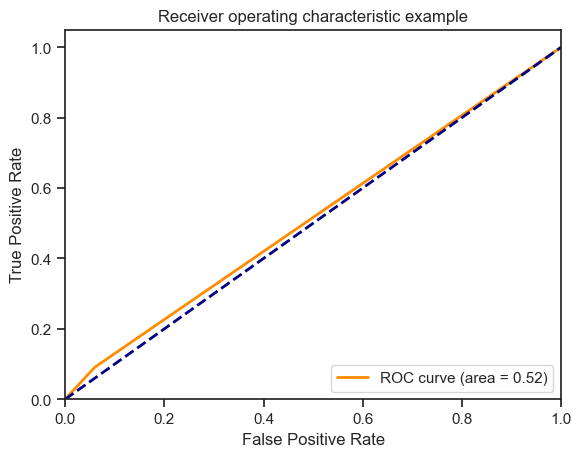

In [62]:
# Для 2 ближайших соседей
draw_roc_curve(bin_wine_y_test, bin_target1_1, pos_label=1, average='micro')

In [63]:
# Для 10 ближайших соседей
bin_cl1_2 = KNeighborsClassifier(n_neighbors=10)
bin_cl1_2.fit(wine_X_train, bin_wine_y_train)
proba_target2_1 = bin_cl1_2.predict_proba(wine_X_test)
true_proba_target2_1 = proba_target2_1[:,1]
roc_curve_k10_res = roc_curve(bin_wine_y_test, true_proba_target2_1, pos_label=1)
roc_curve_k10_res

(array([0.        , 0.01492537, 0.04477612, 0.19402985, 0.32835821,
        0.35820896, 0.41791045, 0.56716418, 1.        ]),
 array([0.        , 0.09090909, 0.18181818, 0.5       , 0.77272727,
        0.90909091, 0.90909091, 1.        , 1.        ]),
 array([inf, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]))

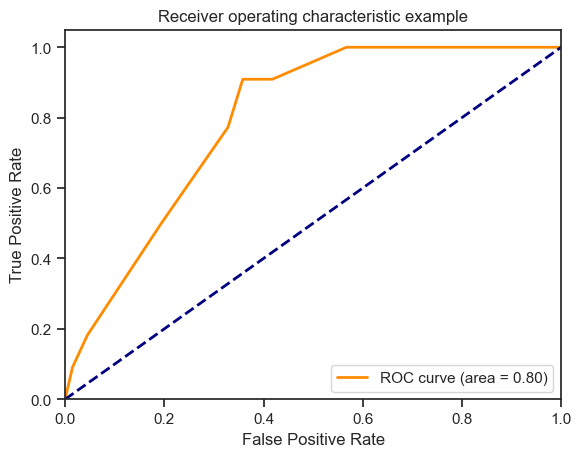

In [64]:
draw_roc_curve(bin_wine_y_test, true_proba_target2_1, pos_label=1, average='micro')

#### Простейшая реализация построения ROC-кривой

In [65]:
def simple_roc_curve(y_true: np.ndarray, y_score: np.ndarray):
    """
    Простая реализация построения ROC-кривой
    """
    # Результирующие массивы
    tpr_arr = []
    fpr_arr = []
    # Получаем уникальные значения вероятностей
    unique_scores = np.unique(y_score)
    # и сортируем их в обратном порядке
    unique_scores_sorted = np.sort(unique_scores)[::-1]
    
    # Считаем количество истинных 0 и 1 значений
    # Истинные 1 - это TP+FN
    P = np.sum(y_true > 0)
    # Истинные 0 - это FP+TN
    N = y_true.size - P
    
    # Внешний цикл по уникальным значениям вероятностей 
    for t_cur in  unique_scores_sorted:
        FP, TP = 0, 0
        # Вложенный цикл по всем предсказаниям
        for y, score in zip(y_true, y_score):
            
            # Если вероятность текущего предсказания больше пороговой
            if score >= t_cur:
                # и истинное значение = 1
                if y > 0:
                    TP = TP + 1
                else:
                    FP = FP + 1
        
        # Вычисление значений TPR и FPR для текущего порога вероятности
        TPR = TP/P
        FPR = FP/N
        # Добавление их в списки
        tpr_arr.append(TPR)
        fpr_arr.append(FPR)
    
    # Формат вывода совпадает с roc_curve
    return np.array(fpr_arr), np.array(tpr_arr), unique_scores_sorted

In [66]:
simple_roc_curve(np.array(bin_wine_y_test), np.array(true_proba_target2_1))

(array([0.01492537, 0.04477612, 0.19402985, 0.32835821, 0.35820896,
        0.41791045, 0.56716418, 1.        ]),
 array([0.09090909, 0.18181818, 0.5       , 0.77272727, 0.90909091,
        0.90909091, 1.        , 1.        ]),
 array([0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]))

In [67]:
# Отрисовка двух ROC-кривых
def draw_roc_curve_2(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    # стандартный метод из sklearn
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    # собственная реализация
    fpr2, tpr2, thresholds2 = simple_roc_curve(y_true, y_score)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot(fpr2, tpr2, color='green', alpha=0.5)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

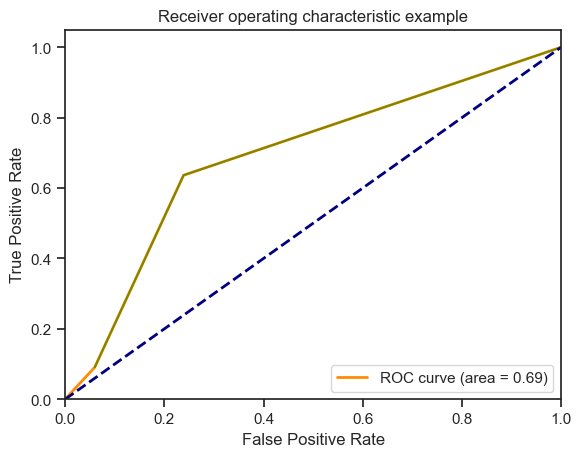

In [68]:
draw_roc_curve_2(np.array(bin_wine_y_test), np.array(true_proba_target1_1), pos_label=1, average='micro')

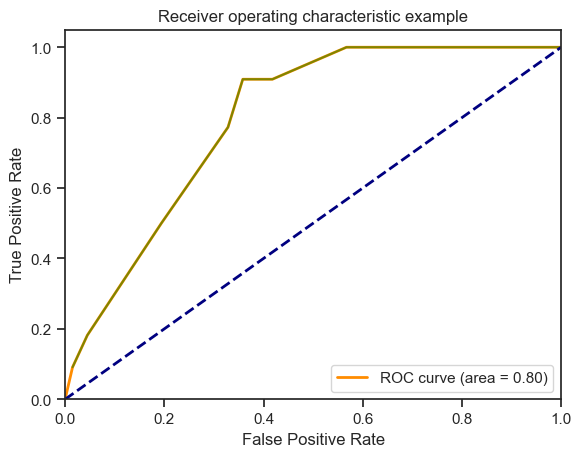

In [69]:
draw_roc_curve_2(np.array(bin_wine_y_test), np.array(true_proba_target2_1), pos_label=1, average='micro')

In [70]:
# Для 10 ближайших соседей
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(wine_X_train, bin_wine_y_train)
proba_lr = lr.predict_proba(wine_X_test)
true_proba_lr = proba_lr[:,1]
roc_curve_lr_res = roc_curve(bin_wine_y_test, true_proba_lr, pos_label=1)
roc_curve_lr_res

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([0., 0., 0., 1.]),
 array([0.        , 0.04545455, 1.        , 1.        ]),
 array([           inf, 9.99285791e-01, 2.14619238e-01, 2.57589814e-04]))

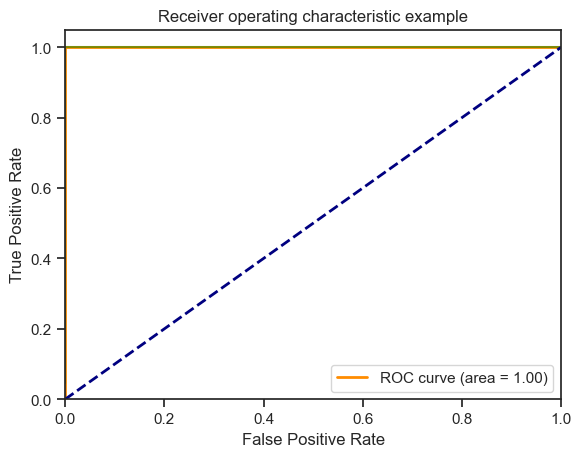

In [71]:
draw_roc_curve_2(np.array(bin_wine_y_test), np.array(true_proba_lr), pos_label=1, average='micro')

# Оптимизация гиперпараметров

In [97]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve

In [95]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [98]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(wine_X_train, wine_y_train)

CPU times: total: 766 ms
Wall time: 504 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [99]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00230827, 0.00181093, 0.0017056 , 0.00160365, 0.00212407,
        0.00181518, 0.0013917 , 0.00094032, 0.00099244, 0.00141907]),
 'std_fit_time': array([5.68183351e-04, 4.07501325e-04, 6.11902152e-04, 4.92626498e-04,
        2.50950295e-04, 4.09223877e-04, 4.99339797e-04, 2.55349526e-04,
        2.96930599e-05, 5.14069204e-04]),
 'mean_score_time': array([0.00763421, 0.0063158 , 0.00689416, 0.0064858 , 0.00761876,
        0.00585141, 0.00780864, 0.00839443, 0.00807304, 0.00897655]),
 'std_score_time': array([0.00081751, 0.00074697, 0.00106942, 0.00061728, 0.00071385,
        0.00078474, 0.00115532, 0.00032853, 0.00039608, 0.00046273]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_ne

In [100]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=15)

In [101]:
# Лучшее значение метрики
clf_gs.best_score_

0.7189542483660132

In [102]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 15}

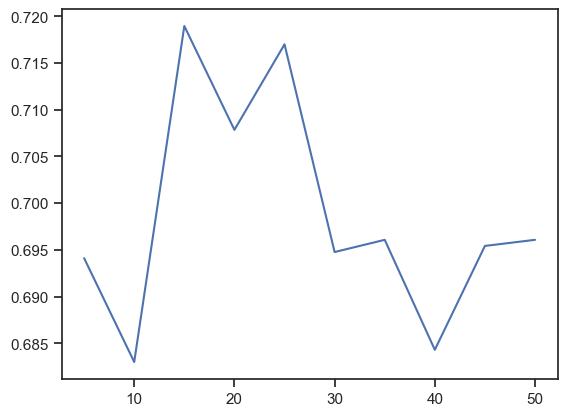

In [103]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

### Randomized Search

In [104]:
%%time
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_rs.fit(wine_X_train, wine_y_train)

CPU times: total: 703 ms
Wall time: 539 ms


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
                   scoring='accuracy')

In [105]:
# В данном случае оба способа нашли одинаковое решение
clf_rs.best_score_, clf_rs.best_params_

(0.7189542483660132, {'n_neighbors': 15})

In [106]:
clf_gs.best_score_, clf_gs.best_params_

(0.7189542483660132, {'n_neighbors': 15})

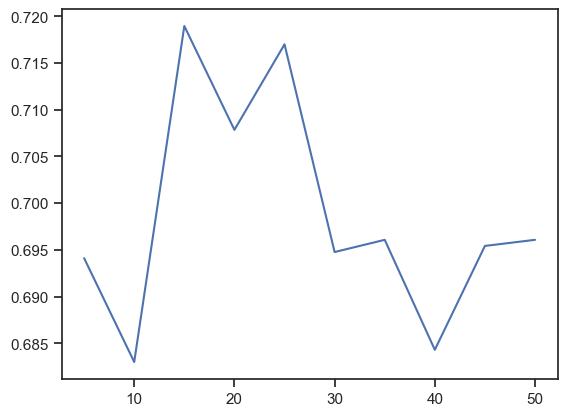

In [107]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_rs.cv_results_['mean_test_score'])

## Стратегии кросс-валидации

### [K-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)

Данная стратегия работает в соответствии с определением кросс-валидации.

Каждой стратегии в scikit-learn ставится в соответствии специальный класс-итератор, который может быть указан в качестве параметра cv функций cross_val_score и cross_validate.

In [108]:
# Возвращаются индексы элементов
X = ["a", "b", "c"]
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[1 2] [0]
[0 2] [1]
[0 1] [2]


In [109]:
X = range(12)
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test))
    

[ 4  5  6  7  8  9 10 11] [0 1 2 3]
[ 0  1  2  3  8  9 10 11] [4 5 6 7]
[0 1 2 3 4 5 6 7] [ 8  9 10 11]


In [110]:
kf = KFold(n_splits=5)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         wine.data, wine.target, scoring='f1_weighted', 
                         cv=kf)
scores

array([0.92537313, 0.86969697, 0.77966102, 0.65924812, 0.        ])

In [112]:
kf = KFold(n_splits=5)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        wine.data, wine.target, scoring=scoring, 
                        cv=kf, return_train_score=True)
scores

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: Undefin

{'fit_time': array([0.00300264, 0.00305605, 0.00202465, 0.00313163, 0.00213075]),
 'score_time': array([0.0254271 , 0.02240205, 0.01990318, 0.02374816, 0.02610898]),
 'test_precision': array([1.        , 0.90939153, 1.        , 0.69659864, 0.        ]),
 'train_precision': array([0.87898859, 0.89700325, 0.89859407, 0.87809081, 0.90796956]),
 'test_recall': array([0.86111111, 0.83333333, 0.63888889, 0.68571429, 0.        ]),
 'train_recall': array([0.85915493, 0.88028169, 0.88028169, 0.86013986, 0.9020979 ]),
 'test_f1': array([0.92537313, 0.86969697, 0.77966102, 0.65924812, 0.        ]),
 'train_f1': array([0.85579923, 0.87555637, 0.87794358, 0.85195658, 0.89135438])}

### [Leave One Out (LOO)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#sklearn.model_selection.LeaveOneOut)

В тестовую выборку помещается единственный элемент (One Out). Количество фолдов в этом случае определяется автоматически и равняется количеству элементов.


In [116]:
X = range(12)
# Эквивалент KFold(n_splits=n)
kf = LeaveOneOut()
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 1  2  3  4  5  6  7  8  9 10 11] [0]
[ 0  2  3  4  5  6  7  8  9 10 11] [1]
[ 0  1  3  4  5  6  7  8  9 10 11] [2]
[ 0  1  2  4  5  6  7  8  9 10 11] [3]
[ 0  1  2  3  5  6  7  8  9 10 11] [4]
[ 0  1  2  3  4  6  7  8  9 10 11] [5]
[ 0  1  2  3  4  5  7  8  9 10 11] [6]
[ 0  1  2  3  4  5  6  8  9 10 11] [7]
[ 0  1  2  3  4  5  6  7  9 10 11] [8]
[ 0  1  2  3  4  5  6  7  8 10 11] [9]
[ 0  1  2  3  4  5  6  7  8  9 11] [10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11]


### проверим оптимальную модель


In [117]:
# 15 ближайших соседей
cl1_4 = KNeighborsClassifier(n_neighbors=15)
cl1_4.fit(wine_X_train, wine_y_train)
target1_4 = cl1_4.predict(wine_X_test)
len(target1_4), target1_4

(89,
 array([1, 1, 2, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1,
        2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2,
        0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0,
        1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0,
        1]))

In [122]:
# 10 ближайших соседей
accuracy_score(wine_y_test, target1_2)

0.6629213483146067

In [118]:
# 15 ближайших соседей
accuracy_score(wine_y_test, target1_4)

0.7078651685393258

In [121]:
# 10 ближайших соседей
print_accuracy_score_for_classes(wine_y_test, target1_2)

Метка 	 Accuracy
0 	 0.7878787878787878
1 	 0.8235294117647058
2 	 0.22727272727272727


In [119]:
# 15 ближайших соседей
print_accuracy_score_for_classes(wine_y_test, target1_4)

Метка 	 Accuracy
0 	 0.8484848484848485
1 	 0.7647058823529411
2 	 0.4090909090909091


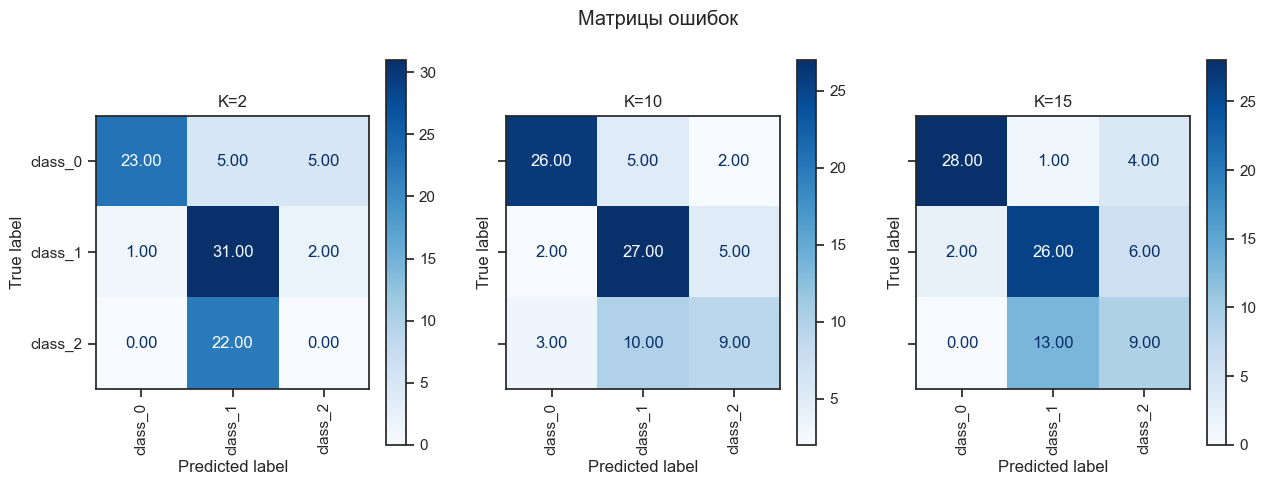

In [123]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))

confusion_matrix1 = confusion_matrix(wine_y_test, cl1_1.predict(wine_X_test))
disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix1, display_labels=wine.target_names)
disp1.plot(cmap=plt.cm.Blues, ax=ax[0], xticks_rotation='vertical', values_format='.2f')
disp1.ax_.set_title('K=2')

confusion_matrix2 = confusion_matrix(wine_y_test, cl1_2.predict(wine_X_test))
disp2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix2, display_labels=wine.target_names)
disp2.plot(cmap=plt.cm.Blues, ax=ax[1], xticks_rotation='vertical', values_format='.2f')
disp2.ax_.set_title('K=10')

confusion_matrix4 = confusion_matrix(wine_y_test, cl1_4.predict(wine_X_test))
disp3 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix4, display_labels=wine.target_names)
disp3.plot(cmap=plt.cm.Blues, ax=ax[2], xticks_rotation='vertical', values_format='.2f')
disp3.ax_.set_title('K=15')

fig.suptitle('Матрицы ошибок')

plt.show()

In [125]:
# 15 ближайших соседов
bin_cl1_4 = KNeighborsClassifier(n_neighbors=15)
bin_cl1_4.fit(wine_X_train, bin_wine_y_train)
# предскажем метки классов
bin_cl1_4.predict(wine_X_test)

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [127]:
bin_target1_4 = convert_target_to_binary(target1_4, 2)

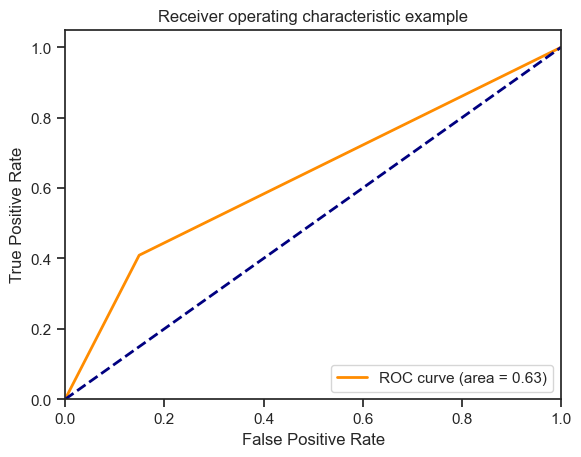

In [129]:
# Для 15 ближайших соседей
draw_roc_curve(bin_wine_y_test, bin_target1_4, pos_label=1, average='micro')